# 01. Data Exploration: NASA C-MAPSS FD001

This notebook performs the first step of the project: loading and exploring the raw `train_FD001.txt` dataset.

**Goals:**
1.  Load the space-delimited text file into a `pandas` DataFrame.
2.  Assign the correct column names based on the `readme.txt`.
3.  Perform initial verification (check shape, dtypes, null values).
4.  Visualize the run-to-failure nature of the data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')

## 1. Data Loading and Column Naming

Based on the `readme.txt`, the data is space-delimited and has no header. It contains 26 columns:
* `unit_number`
* `time_in_cycles`
* 3 operational settings (`op_setting_1` to `3`)
* 21 sensor readings (`sensor_1` to `21`)

We will define these column names and use them to load the data.

In [10]:
# Define the column names based on the readme.txt
op_settings = [f'op_setting_{i+1}' for i in range(3)]
sensors = [f'sensor_{i+1}' for i in range(21)]
cols = ['unit_number', 'time_in_cycles'] + op_settings + sensors

# Filepath
data_path = '../data/CMAPSSData/train_FD001.txt'

# Read the data
try:
    df = pd.read_csv(data_path, sep=r"\s+", header=None)
    
    # Assign the column names
    df.columns = cols
    
except FileNotFoundError:
    print(f"Error: Data file not found at {data_path}")
    print("Please download the 'train_FD001.txt' file and place it in the 'data/' directory.")

## 2. Initial Data Verification

We will check the first few rows, the data types, and the null value counts to ensure the data was loaded correctly.

In [11]:
# Check the first 5 rows
print("--- Data Head ---")
print(df.head())

# Check the data types and look for null values
# We expect 20631 entries, 26 columns, and 0 nulls
print("\n--- Data Info ---")
df.info()

# Check for any nulls (should be 0)
print(f"\nTotal Null Values: {df.isnull().sum().sum()}")

# Get basic descriptive statistics
print("\n--- Data Description ---")
print(df.describe())

--- Data Head ---
   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1       -0.0007       -0.0004         100.0   
1            1               2        0.0019       -0.0003         100.0   
2            1               3       -0.0043        0.0003         100.0   
3            1               4        0.0007        0.0000         100.0   
4            1               5       -0.0019       -0.0002         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  \
0    518.67    641.82   1589.70   1400.60     14.62  ...     521.66   
1    518.67    642.15   1591.82   1403.14     14.62  ...     522.28   
2    518.67    642.35   1587.99   1404.20     14.62  ...     522.42   
3    518.67    642.35   1582.79   1401.87     14.62  ...     522.86   
4    518.67    642.37   1582.85   1406.22     14.62  ...     522.19   

   sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  \
0    2388.02    8138.62    

## 3. Exploratory Visualization (Run-to-Failure)

The `readme.txt` states this dataset is "run-to-failure." Let's verify this by plotting the `time_in_cycles` for a few sample engines (e.g., the first 5 units). We expect to see that each engine `unit_number` has a different total lifespan.

--- Engine Lifespans (First 10) ---
unit_number
1     192
2     287
3     179
4     189
5     269
6     188
7     259
8     150
9     201
10    222
Name: time_in_cycles, dtype: int64


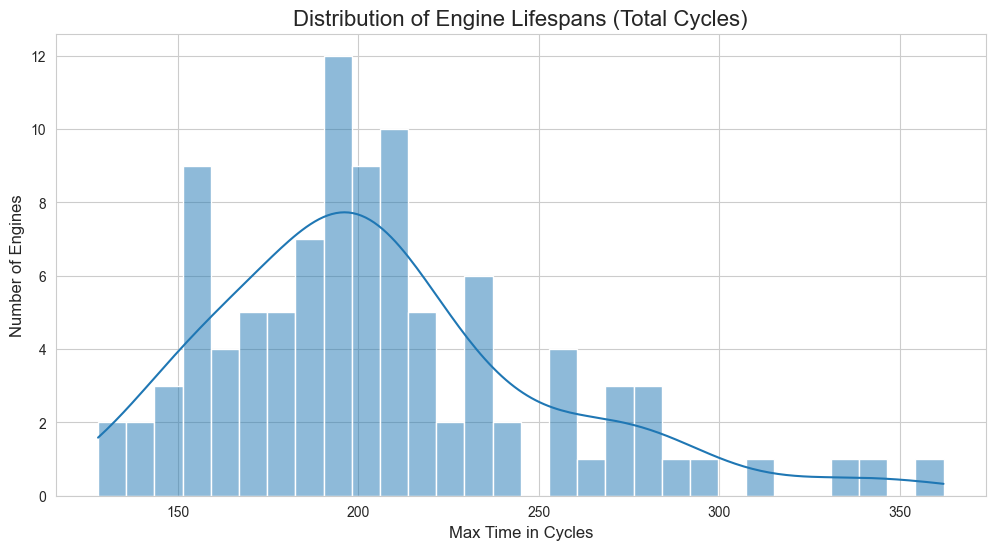

In [12]:
# Get the total number of cycles (lifespan) for each engine
lifespans = df.groupby('unit_number')['time_in_cycles'].max()

print(f"--- Engine Lifespans (First 10) ---")
print(lifespans.head(10))

# Plot the distribution of lifespans
plt.figure(figsize=(12, 6))
sns.histplot(lifespans, bins=30, kde=True)
plt.title('Distribution of Engine Lifespans (Total Cycles)', fontsize=16)
plt.xlabel('Max Time in Cycles', fontsize=12)
plt.ylabel('Number of Engines', fontsize=12)
plt.show()

### Observations:

* The data loaded successfully. We have 20,631 rows, 26 columns, and no null values.
* The `df.describe()` output shows that some sensors have constant values (e.g., `sensor_1`, `5`, `6`, `10`, `16`, `18`, `19`). We will need to remember this for preprocessing, as these columns will have zero variance and should be dropped.
* The histogram confirms the run-to-failure nature. The dataset contains 100 unique engines (`unit_number` 1 to 100), each with a different lifespan ranging from ~125 to ~375 cycles.

We are ready to move on to preprocessing.